# HEART FAILURE PREDICTION BY USING PYTHON AND ML

![](pic.png)

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the dataset
heart_pred = pd.read_csv("heart_failure_clinical_records.csv")

#first five rows
heart_pred.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### EDA - Exploratory Data Analysis by Statistical Analysis

In [3]:
#Number of rows and number of columns
heart_pred.shape

(299, 13)

In [4]:
#Name of the columns
heart_pred.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
#Counting the number of times an object appears
heart_pred.count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

In [6]:
#Data type of various variable
heart_pred.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
#Number of unique values present in various variables
heart_pred.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [8]:
#Sum of null values if present in dataset
heart_pred.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
#INformation about dataset
heart_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
#Analysing the dataset
heart_pred.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### EDA - Exploratory Data Analysis by Data Visualization

In [11]:
#Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

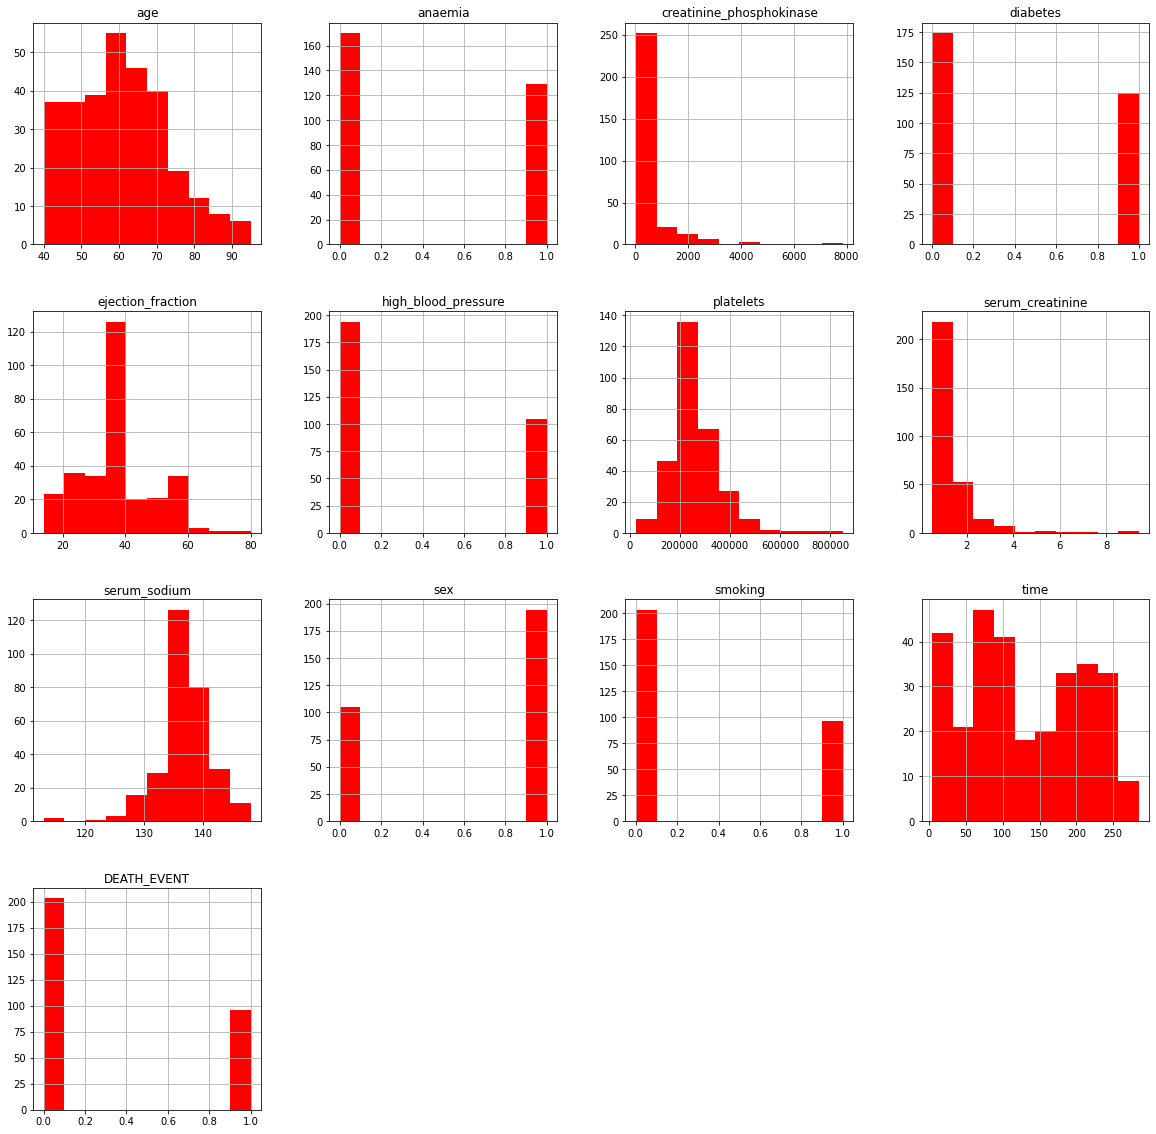

In [12]:
# plot histograms for each numerical variable
heart_pred.hist(figsize = (20, 20),color='red')
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

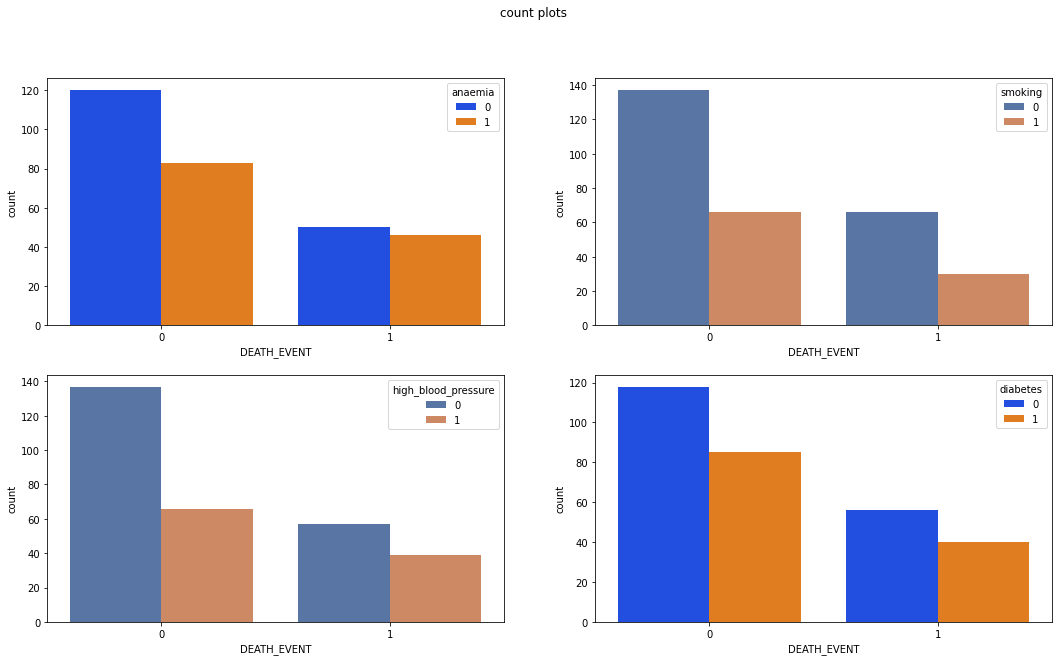

In [13]:
#Plotting count plot for all the Binary digits variables
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('count plots')

sns.countplot(ax=axes[0, 0],x='DEATH_EVENT',hue='anaemia',data=heart_pred,palette='bright')
sns.countplot(ax=axes[0, 1],x='DEATH_EVENT',hue='smoking',data=heart_pred,palette='deep')
sns.countplot(ax=axes[1, 0],x='DEATH_EVENT',hue='high_blood_pressure',data=heart_pred,palette='deep')
sns.countplot(ax=axes[1, 1],x='DEATH_EVENT',hue='diabetes',data=heart_pred,palette='bright')

In [14]:
#Creating cross table between two variables
pd.crosstab(heart_pred['high_blood_pressure'], heart_pred['DEATH_EVENT'], normalize='index').round(2)

DEATH_EVENT,0,1
high_blood_pressure,,
0,0.71,0.29
1,0.63,0.37


In [15]:
#Creating cross table between two variables
pd.crosstab(heart_pred['diabetes'], heart_pred['DEATH_EVENT'], normalize='index').round(2)

DEATH_EVENT,0,1
diabetes,,
0,0.68,0.32
1,0.68,0.32


In [16]:
#Creating cross table between two variables
pd.crosstab(heart_pred['smoking'], heart_pred['DEATH_EVENT'], normalize='index').round(2)

DEATH_EVENT,0,1
smoking,,
0,0.67,0.33
1,0.69,0.31


#### Boolean features
        * Sex - Gender of patient Male = 1, Female =0
        * Diabetes - 0 = No, 1 = Yes
        * Anaemia - 0 = No, 1 = Yes
        * High_blood_pressure - 0 = No, 1 = Yes
        * Smoking - 0 = No, 1 = Yes
        * DEATH_EVENT - 0 = No, 1 = Yes

In [17]:
#Finding correlation between the variables
heart_pred.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


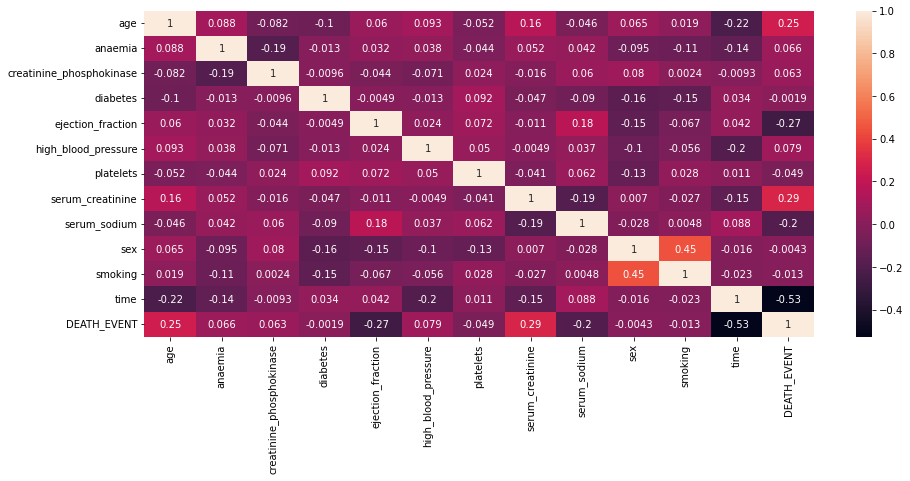

In [18]:
#Correlation through heatmap
plt.figure(figsize=(15,6))
sns.heatmap(heart_pred.corr(), annot = True)
plt.show()

### Identifying Outliers by using BOXPLOT

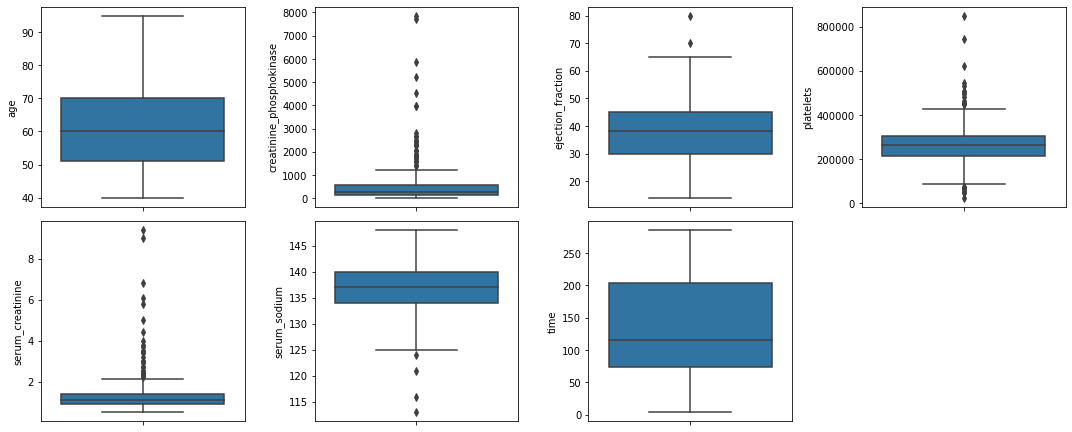

In [19]:
#Identifying Outliers by using BOXPLOT
dfd = heart_pred.drop(columns=['DEATH_EVENT','diabetes','sex','anaemia', 'high_blood_pressure', 'smoking'], axis=1)
fig= plt.figure(figsize=(15,15))
for i in range(len(dfd.columns)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(y=dfd.iloc[:,i])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='smoking', ylabel='count'>

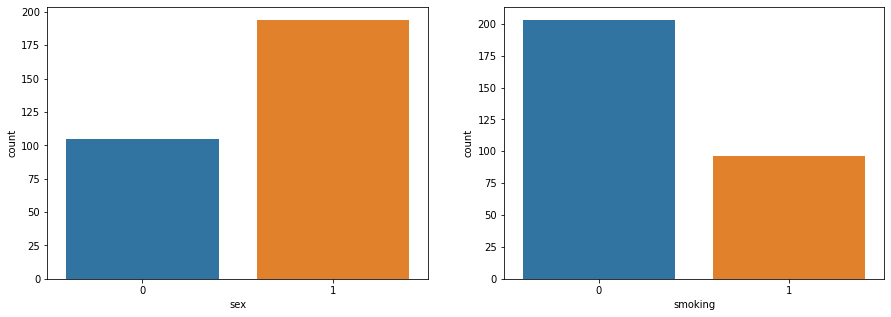

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(heart_pred['sex'])

plt.subplot(1,2,2)
sns.countplot(heart_pred['smoking'])

### Removing the Outliers

#### Removing the outliers of 'ejection_fraction'

In [21]:
#Setting inter quantile range
Q1, Q3 = heart_pred['ejection_fraction'].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [22]:
#Upper Limit Value
UL

67.5

In [23]:
#Cheking the values whose upper limits more than UL
df = heart_pred[heart_pred['ejection_fraction'] > UL]
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [24]:
#Counting the Outliers
df['ejection_fraction'].count()

2

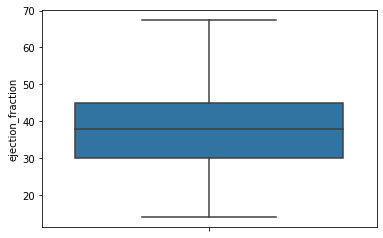

In [25]:
#Replacing Outliers with UL
heart_pred['ejection_fraction']=np.where(heart_pred['ejection_fraction'] > UL, UL, heart_pred['ejection_fraction'])

#Plotting the variable
sns.boxplot(y=heart_pred['ejection_fraction'])
plt.show()

Removing the outliers of 'creatinine_phosphokinase'

In [26]:
#Setting inter quantile range
Q1, Q3 = heart_pred['creatinine_phosphokinase'].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [27]:
#Upper Limit Value
UL

1280.25

In [28]:
#Cheking the values whose upper limits more than UL
dff = heart_pred[heart_pred['creatinine_phosphokinase'] > UL]
dff

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38.0,0,263358.03,1.10,136,1,0,6,1
38,60.0,0,2656,1,30.0,0,305000.00,2.30,137,1,0,30,0
46,51.0,0,1380,0,25.0,1,271000.00,0.90,130,1,0,38,1
52,60.0,0,3964,1,62.0,0,263358.03,6.80,146,0,0,43,1
60,45.0,0,7702,1,25.0,1,390000.00,1.00,139,1,0,60,1
72,85.0,0,5882,0,35.0,0,243000.00,1.00,132,1,1,72,1
103,42.0,0,5209,0,30.0,0,226000.00,1.00,140,1,1,87,0
107,45.0,1,1876,1,35.0,0,226000.00,0.90,138,1,0,88,0
130,53.0,1,1808,0,60.0,1,249000.00,0.70,138,1,1,106,0
134,81.0,0,4540,0,35.0,0,231000.00,1.18,137,1,1,107,0


In [29]:
#Counting the Outliers
dff['creatinine_phosphokinase'].count()

29

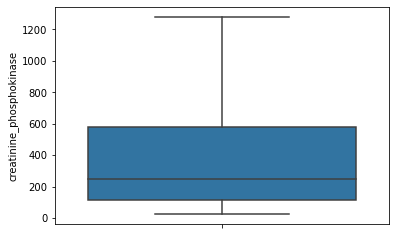

In [30]:
#Replacing Outliers with UL
heart_pred['creatinine_phosphokinase']=np.where(heart_pred['creatinine_phosphokinase'] > UL, UL, heart_pred['creatinine_phosphokinase'])

#Plotting the variable
sns.boxplot(y=heart_pred['creatinine_phosphokinase'])
plt.show()

Removing the outliers of 'serum_creatinine'

In [31]:
#Setting inter quantile range
Q1, Q3 = heart_pred['serum_creatinine'].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

#Upper Limit Value
UL

2.1499999999999995

In [32]:
#Cheking the values whose upper limits more than UL
df1 = heart_pred[heart_pred['serum_creatinine'] > UL]
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160.00,1,20.0,0,327000.00,2.7,116,0,0,8,1
9,80.0,1,123.00,0,35.0,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81.00,0,38.0,1,368000.00,4.0,131,1,1,10,1
28,58.0,1,60.00,0,38.0,0,153000.00,5.8,134,1,0,26,1
31,85.0,0,23.00,0,45.0,0,360000.00,3.0,132,1,0,28,1
35,69.0,0,582.00,1,35.0,0,228000.00,3.5,134,1,0,30,1
38,60.0,0,1280.25,1,30.0,0,305000.00,2.3,137,1,0,30,0
39,60.0,0,235.00,1,38.0,0,329000.00,3.0,142,0,0,30,1
48,80.0,1,553.00,0,20.0,1,140000.00,4.4,133,1,0,41,1
52,60.0,0,1280.25,1,62.0,0,263358.03,6.8,146,0,0,43,1


In [33]:
#Counting the Outliers
df1['serum_creatinine'].count()

29

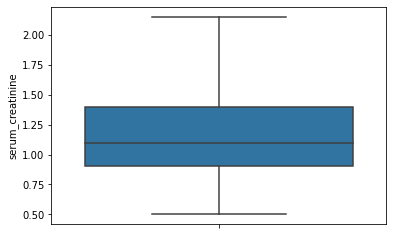

In [34]:
#Replacing Outliers with UL
heart_pred['serum_creatinine']=np.where(heart_pred['serum_creatinine'] > UL, UL, heart_pred['serum_creatinine'])

#Plotting the variable
sns.boxplot(y=heart_pred['serum_creatinine'])
plt.show()

Removing the outliers of 'platelets'

In [35]:
#Setting inter quantile range
Q1, Q3 = heart_pred['platelets'].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

#Upper Limit Value
UL

440000.0

In [36]:
#Cheking the values whose upper limits more than UL
dff1 = heart_pred[heart_pred['platelets'] > UL]
dff1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
7,60.0,1,315.00,1,60.0,0,454000.0,1.10,131,1,1,10,1
47,60.0,0,582.00,1,38.0,1,451000.0,0.60,138,1,1,40,1
55,95.0,1,371.00,0,30.0,0,461000.0,2.00,132,1,0,50,1
69,65.0,0,113.00,1,25.0,0,497000.0,1.83,135,1,0,67,1
105,72.0,1,328.00,0,30.0,1,621000.0,1.70,138,0,1,88,1
109,45.0,0,292.00,1,35.0,0,850000.0,1.30,142,1,1,88,0
117,85.0,1,102.00,0,60.0,0,507000.0,2.15,138,0,0,94,0
162,63.0,1,582.00,0,40.0,0,448000.0,0.90,137,1,1,123,0
212,78.0,0,224.00,0,50.0,0,481000.0,1.40,138,1,1,192,0
224,58.0,0,582.00,1,25.0,0,504000.0,1.00,138,1,0,205,0


In [37]:
#Counting the Outliers
dff1['platelets'].count()

14

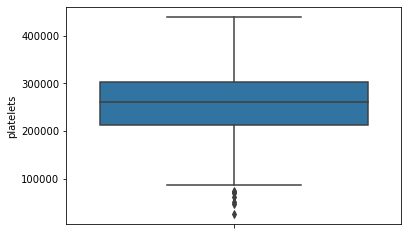

In [38]:
#Replacing Outliers with UL
heart_pred['platelets']=np.where(heart_pred['platelets'] > UL, UL, heart_pred['platelets'])

#Plotting the variable
sns.boxplot(y=heart_pred['platelets'])
plt.show()

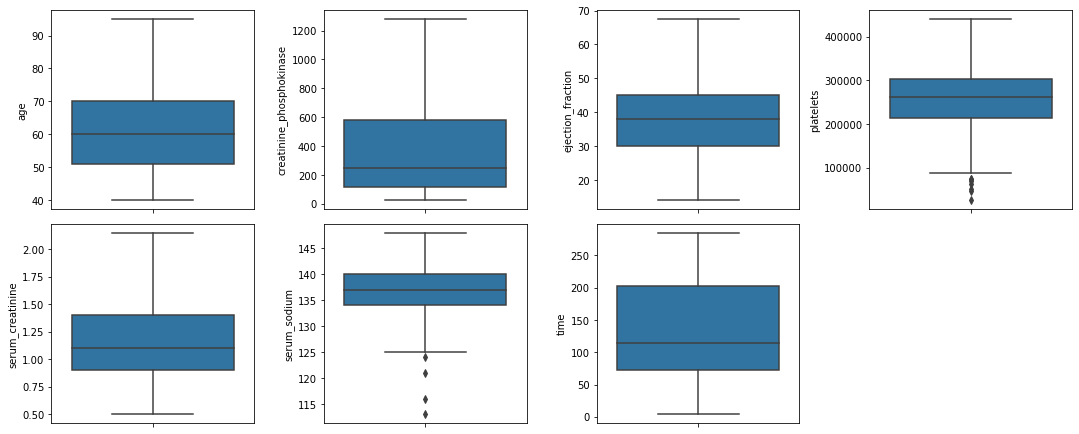

In [39]:
#Present of outliers by using BOXPLOT
dfd = heart_pred.drop(columns=['DEATH_EVENT','diabetes','sex','anaemia', 'high_blood_pressure', 'smoking'], axis=1)
fig= plt.figure(figsize=(15,15))
for i in range(len(dfd.columns)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(y=dfd.iloc[:,i])
plt.tight_layout()
plt.show()

### Splitting Dataset into X and y train and test

In [40]:
#Importing required library
from sklearn.model_selection import train_test_split

In [41]:
#Assigning variables in X and y
X = heart_pred.drop('DEATH_EVENT', axis=1)
y = heart_pred['DEATH_EVENT']

In [42]:
#Checking variables in X
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280


In [43]:
#Checking variables in y
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [44]:
#Splitting X and y into 80% training and 20% testing test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

## Logistic Regression Algorithm
#### It comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables. 

In [45]:
#Importing required library
from sklearn.linear_model import LogisticRegression

#Creating an instance
lr = LogisticRegression()

#Fitting logistic instance on training set
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
#Predicting value on test se
y_pred = lr.predict(X_test)

In [47]:
#Importing required library
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
#Creating Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[42,  4],
       [ 3, 11]], dtype=int64)

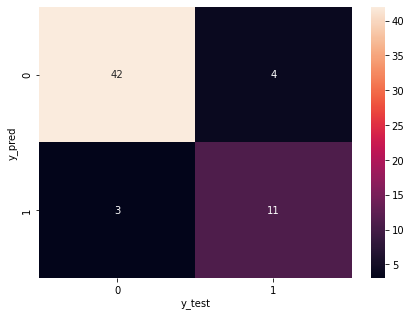

In [49]:
#Importing required library
%matplotlib inline

#Creating confusion matrix on heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

Checking the accuracy : (42 + 11) / (42 + 4 + 11 + 3)

In [50]:
#Importing required library
from sklearn.metrics import accuracy_score

#Accuracy of Logistic Regression
log_score = accuracy_score(y_test, y_pred)
print(f'Accuracy_Score: {accuracy_score(y_test, y_pred)*100:.2f}%')

Accuracy_Score: 88.33%


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.73      0.79      0.76        14

    accuracy                           0.88        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.89      0.88      0.88        60



## K-Nearest Neighbor(KNN) Algorithm
#### K-Nearest Neighbour based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [52]:
#Importing required library
from sklearn.neighbors import KNeighborsClassifier

#Creating an instance
knn = KNeighborsClassifier(n_neighbors = 4)

#Fitting instance on training set
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [53]:
#Checking the Score
knn.score(X_train,y_train)

0.7154811715481172

In [54]:
#Predicting value on test se
y_predict = knn.predict(X_test)

#Creating Confusion Matrix
cmm = confusion_matrix(y_test,y_predict)
cmm

array([[43,  3],
       [13,  1]], dtype=int64)

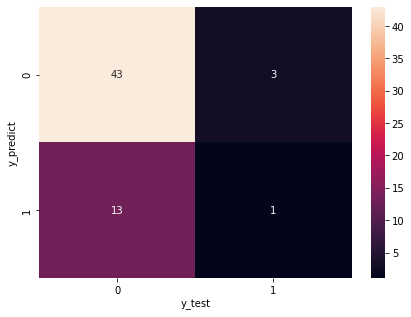

In [55]:
#Creating confusion matrix on heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cmm,annot=True)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

Checking the Accuracy : (43 + 1) / (43 +3 +13 + 1)

In [56]:
#Accuracy of of KNN Algorithm
knn_score = accuracy_score(y_test, y_predict)
print(f'Accuracy_Score: {accuracy_score(y_test, y_predict)*100:.2f}%')

Accuracy_Score: 73.33%


In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        46
           1       0.25      0.07      0.11        14

    accuracy                           0.73        60
   macro avg       0.51      0.50      0.48        60
weighted avg       0.65      0.73      0.67        60



### Comparison of Accuracy of Logistic Regression and KNN Algorithm

In [58]:
#Comparing Logistic Regression and KNN Algorithnm
models = ['Logistic Regression', 'KNN Algorithm']
model_data = {'Accuracy_Score':[88.33, 73.33]}
compare = pd.DataFrame(data=model_data, index=models)
compare

,Accuracy_Score
Logistic Regression,88.33
KNN Algorithm,73.33


In [59]:
#Another way of comparing Accuracy
print(f'Logistic Regression Accuracy_Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'KNN Accuracy_Score: {accuracy_score(y_test, y_predict)*100:.2f}%')

Logistic Regression Accuracy_Score: 88.33%
KNN Accuracy_Score: 73.33%


#### By comparing the Accuracy of both the Algorithms we obtained that Logistic Regression gives better accuracy in predicting the Heart Failure in comparison to KNN Algorithm.